# Sentiment Analysis using Naive Bayes with CountVectorizer 






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
tweet_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/train.csv")

In [ ]:
tweet_train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
tweet_train = tweet_train.drop(['id'],axis=1)

In [ ]:
print(tweet_train)

       label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]


In [ ]:
tweet_train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
tweet_train['num_chars'] = tweet_train.tweet.apply(len)

In [ ]:
tweet_train

,label,tweet,num_chars
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [ ]:
import string
import nltk # Natural Language tool kit 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_clean

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweet_train_countvectorizer = vectorizer.fit_transform(tweet_train['tweet'])

In [ ]:
tweet_train_countvectorizer.shape

(31962, 47386)

In [ ]:
X = tweet_train_countvectorizer

In [ ]:
y = tweet_train['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

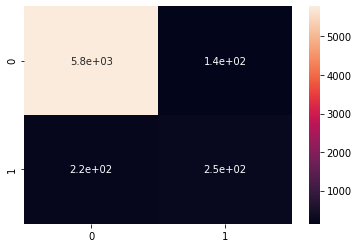

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5921
           1       0.64      0.54      0.58       472

    accuracy                           0.94      6393
   macro avg       0.80      0.76      0.78      6393
weighted avg       0.94      0.94      0.94      6393

